In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

In [ ]:
df = pd.read_csv("24-medical_cost.csv")

In [4]:
df.head()

Id  age     sex     bmi  children smoker     region      charges
0   1   19  female  27.900         0    yes  southwest  16884.92400
1   2   18    male  33.770         1     no  southeast   1725.55230
2   3   28    male  33.000         3     no  southeast   4449.46200
3   4   33    male  22.705         0     no  northwest  21984.47061
4   5   32    male  28.880         0     no  northwest   3866.85520

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Id        1338 non-null   int64  
 1   age       1338 non-null   int64  
 2   sex       1338 non-null   object 
 3   bmi       1338 non-null   float64
 4   children  1338 non-null   int64  
 5   smoker    1338 non-null   object 
 6   region    1338 non-null   object 
 7   charges   1338 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 83.8+ KB


In [6]:
df.describe()

Id          age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000  1338.000000   1338.000000
mean    669.500000    39.207025    30.663397     1.094918  13270.422265
std     386.391641    14.049960     6.098187     1.205493  12110.011237
min       1.000000    18.000000    15.960000     0.000000   1121.873900
25%     335.250000    27.000000    26.296250     0.000000   4740.287150
50%     669.500000    39.000000    30.400000     1.000000   9382.033000
75%    1003.750000    51.000000    34.693750     2.000000  16639.912515
max    1338.000000    64.000000    53.130000     5.000000  63770.428010

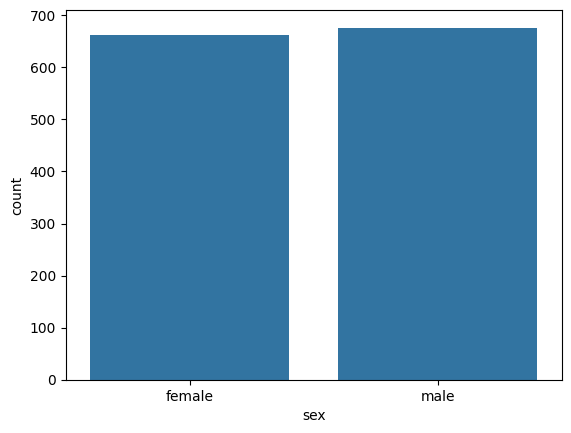

In [7]:
sns.countplot(data = df, x = "sex")
plt.show()

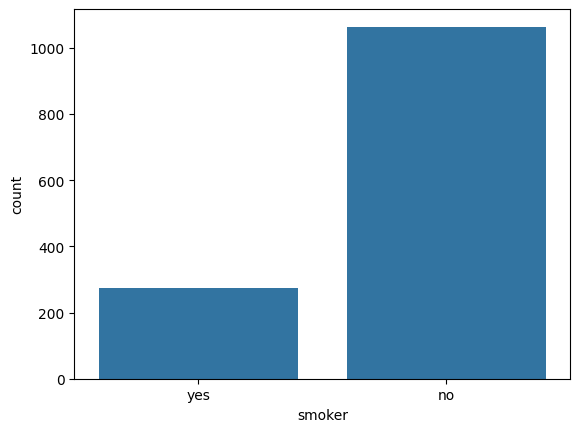

In [8]:
sns.countplot(data = df, x = "smoker")
plt.show()

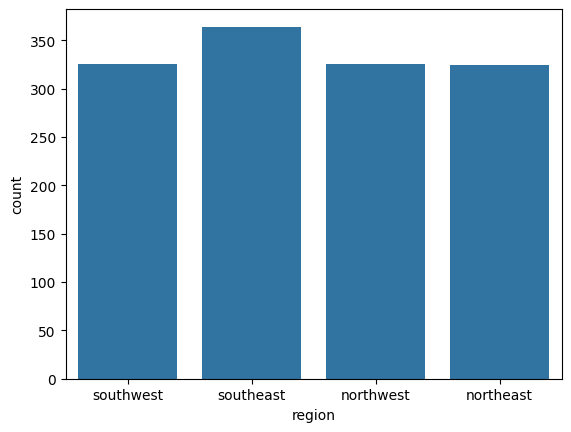

In [9]:
sns.countplot(data = df, x = "region")
plt.show()

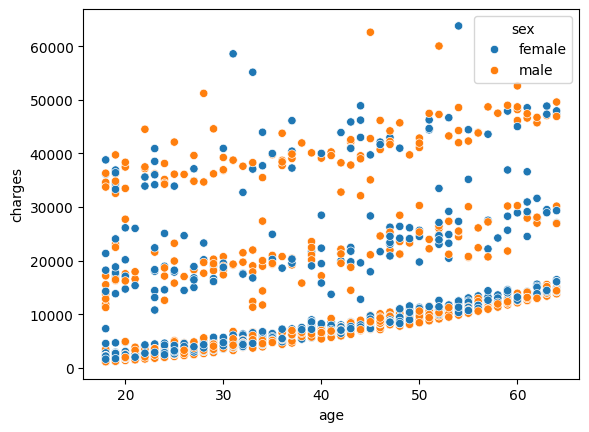

In [11]:
sns.scatterplot(data= df, x = "age", y = "charges", hue = "sex")
plt.show()

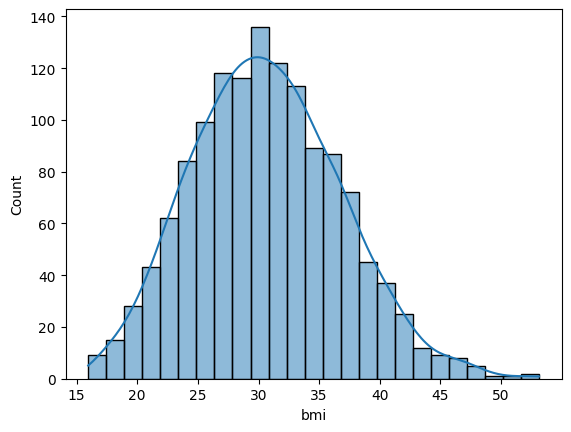

In [13]:
sns.histplot(data = df, x = "bmi", kde = True)
plt.show()

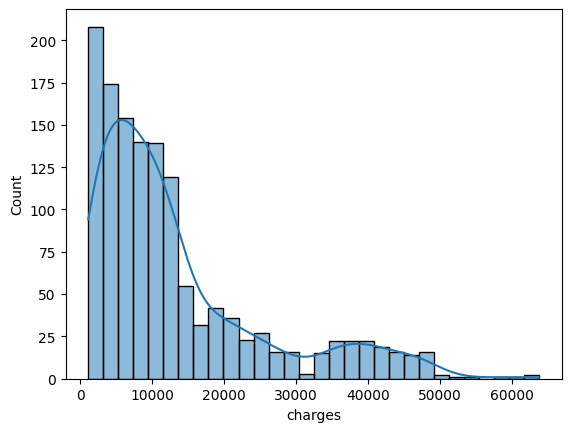

In [14]:
sns.histplot(data = df, x = "charges", kde = True)
plt.show()

In [15]:
df.head()

Id  age     sex     bmi  children smoker     region      charges
0   1   19  female  27.900         0    yes  southwest  16884.92400
1   2   18    male  33.770         1     no  southeast   1725.55230
2   3   28    male  33.000         3     no  southeast   4449.46200
3   4   33    male  22.705         0     no  northwest  21984.47061
4   5   32    male  28.880         0     no  northwest   3866.85520

In [16]:
df.drop("Id", axis = 1, inplace=True)

In [19]:
df["sex"] = df["sex"].map({"male": 0, "female": 1})
df["smoker"] = df["smoker"].map({"no": 0, "yes":1})

In [20]:
df.sex.value_counts()

sex
0    676
1    662
Name: count, dtype: int64

In [21]:
df.smoker.value_counts()

smoker
0    1064
1     274
Name: count, dtype: int64

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(4), object(1)
memory usage: 73.3+ KB


In [23]:
X = df.drop("charges", axis = 1)
y = df["charges"]
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=15)

In [24]:
from sklearn.compose import ColumnTransformer 
from sklearn.preprocessing import OneHotEncoder 
categorical_cols = ["region"]
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(drop = "first", handle_unknown="ignore"), categorical_cols)
    ], remainder = "passthrough"
)

X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [25]:
from lightgbm import LGBMRegressor 
model = LGBMRegressor(verbosity = -1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import r2_score, mean_squared_error
print("R2 Score: ", r2_score(y_test, y_pred))
print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))

R2 Score:  0.871843376594573
Mean Squared Error:  18458085.613847945


/Users/batuhanbasoda/Desktop/CENG/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


In [26]:
param_grid = {
    "n_estimators": [100,300,1000], 
    "learning_rate": [0.01, 0.05, 0.1], 
    "max_depth": [-1, 5,10], 
    "num_leaves": [31,50,70], 
    "min_child_samples": [10,20,30], 
    "colsample_bytree": [0.6,0.8,1.0], 
    "reg_alpha": [0,0.5,1.0], 
    "reg_lambda": [0,0.5,1.0]
}

In [28]:
from sklearn.model_selection import RandomizedSearchCV 
import warnings 
warnings.filterwarnings("ignore")
random_search = RandomizedSearchCV(estimator=LGBMRegressor(verbosity = -1), cv = 5, param_distributions=param_grid
            ,verbose = 0 ,random_state=15, scoring = "neg_root_mean_squared_log_error", n_jobs=-1)
random_search.fit(X_train, y_train)        

/Users/batuhanbasoda/Desktop/CENG/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/batuhanbasoda/Desktop/CENG/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/batuhanbasoda/Desktop/CENG/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/batuhanbasoda/Desktop/CENG/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/batuhanbasoda/Desktop/CENG/anaconda3/lib/python3.13/site-packages/sklearn/model_selection/_validation.py:

RandomizedSearchCV(cv=5, estimator=LGBMRegressor(verbosity=-1), n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'learning_rate': [0.01, 0.05, 0.1],
                                        'max_depth': [-1, 5, 10],
                                        'min_child_samples': [10, 20, 30],
                                        'n_estimators': [100, 300, 1000],
                                        'num_leaves': [31, 50, 70],
                                        'reg_alpha': [0, 0.5, 1.0],
                                        'reg_lambda': [0, 0.5, 1.0]},
                   random_state=15, scoring='neg_root_mean_squared_log_error')

In [29]:
y_pred = random_search.predict(X_test)
print("R2 Score: ", r2_score(y_test, y_pred))
print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))

R2 Score:  0.9027372744291571
Mean Squared Error:  14008512.92674424


In [30]:
random_search.best_params_

{'reg_lambda': 0.5,
 'reg_alpha': 0,
 'num_leaves': 31,
 'n_estimators': 300,
 'min_child_samples': 20,
 'max_depth': 5,
 'learning_rate': 0.01,
 'colsample_bytree': 1.0}

Exception ignored in: <function ResourceTracker.__del__ at 0x1047dd080>
Traceback (most recent call last):
  File "/Users/batuhanbasoda/Desktop/CENG/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/Users/batuhanbasoda/Desktop/CENG/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/Users/batuhanbasoda/Desktop/CENG/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x107099080>
Traceback (most recent call last):
  File "/Users/batuhanbasoda/Desktop/CENG/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/Users/batuhanbasoda/Desktop/CENG/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/Users/batuhanbasoda/Desktop/CENG/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 

In [31]:
from scipy.stats import boxcox

In [32]:
y_train_transformed, lambda_y = boxcox(y_train)

In [33]:
model = LGBMRegressor()
model.fit(X_train,y_train_transformed)

LGBMRegressor()

In [34]:
y_pred_transformed = model.predict(X_test)

In [35]:
def inverse_boxcox(y, lambda_): 
    if lambda_ == 0: 
        return np.exp(y)
    else:
        return np.power(y * lambda_ + 1, 1 / lambda_)

In [36]:
y_pred_original = inverse_boxcox(y_pred_transformed, lambda_y)

In [38]:
print("R2 Score: ", r2_score(y_test, y_pred_original))
print("Mean Squared Error: ", mean_squared_error(y_test, y_pred_original))

R2 Score:  0.8925898035961266
Mean Squared Error:  15470028.378876308
